In [2]:
import math
import numpy as np
import pandas as pd
from IPython.display import Image
from whatif import Model
from whatif import get_sim_results_df

# Part One

## 1A - Base Model

In [3]:
class SingleProductSPF(Model):
    def __init__(self, fixed_cost=60e+3, var_cost=90, selling_price=120, spf_scale=10e+6, spf_exponent=-1.8):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_scale = spf_scale
        self.spf_exponent = spf_exponent
        
    def SPF_demand(self):
        """compute demand"""
        return self.spf_scale * self.selling_price ** self.spf_exponent
    
    def total_cost(self):
        """compute total cost"""
        return self.fixed_cost + self.var_cost * self.SPF_demand()
        
        
    def revenue(self):
        """compute revenue"""
        return self.selling_price * self.SPF_demand()
        
        
    def profit(self):
        """compute profit"""
        profit = self.revenue() - self.total_cost()
        return profit
    
    

In [4]:
model = SingleProductSPF()

In [5]:
model.revenue()

217097.59039144596

In [6]:
model.profit()

-5725.602402138524

In [7]:
model = SingleProductSPF(selling_price = 150)

In [8]:
model.profit()

12641.864731377602

In [9]:
model.SPF_demand()

1210.69774552296

## 1B - One Way Data Table

In [23]:
dt_param_ranges_1 = {'selling_price': np.arange(90, 190, 10)}

In [ ]:
dt_param_ranges_1 = {'selling_price': np.arange(90, 190, 10)}
outputs = ['profit', 'SPF_demand']
m_dt1_df = Model.data_table(model, dt_param_ranges_1, outputs)

ax = m_dt1_df.plot(x="selling_price", y="profit", legend=False)
y_labels = ax.get_yticks()
ax.figure.legend()
plt.show()

In [24]:
outputs = ['profit', 'SPF_demand']

In [25]:
m_dt1_df = Model.data_table(model, dt_param_ranges_1, outputs)

In [26]:
m_dt1_df

,selling_price,profit,SPF_demand
0,90,-60000.000000,3036.431464
1,100,-34881.135685,2511.886432
2,110,-17682.192138,2115.890393
3,120,-5725.602402,1809.146587
4,130,2655.897768,1566.397444
5,140,8539.280352,1370.785607
6,150,12641.864731,1210.697746
7,160,15453.965861,1077.913798
8,170,17318.234466,966.477931
9,180,18478.736125,871.985957


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from matplotlib.ticker import FormatStrFormatter

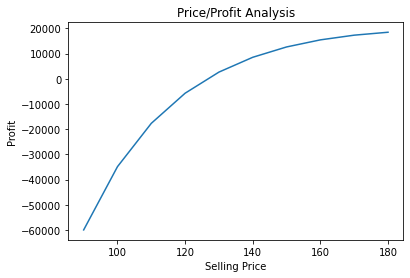

In [50]:
ax = m_dt1_df.plot(x="selling_price", y="profit", legend=False)
plt.ylabel('Profit')
plt.xlabel('Selling Price')
plt.title('Price/Profit Analysis')
plt.show()

We have a quadradic shape to the graph due to our exponential demand function. Since profit is calculated using the demand function (inside of the total_cost function) we see its effect on the graph more clearly in the graph below. Here we have created a table that lists scenarios for prices ranging from \\$90 to \\$450. Now its clear that there is a limit near \\$20K profit where we will begin to see higher prices hamper demand for the product. 

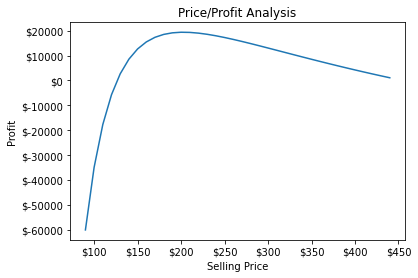

In [65]:
dt_param_ranges_test = {'selling_price': np.arange(90, 450, 10)}
outputs = ['profit', 'SPF_demand']
m_dttest_df = Model.data_table(model, dt_param_ranges_test, outputs)

ax = m_dttest_df.plot(x="selling_price", y="profit", legend=False)
plt.ylabel('Profit')
plt.xlabel('Selling Price')
plt.title('Price/Profit Analysis')
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('$%.0f'))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('$%.0f'))
plt.show()

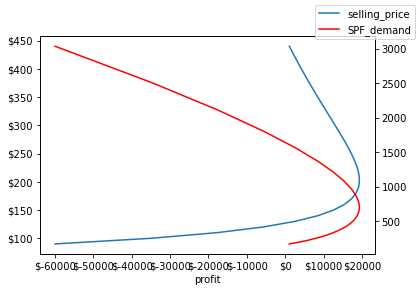

In [74]:
ax = m_dttest_df.plot(x="profit", y="selling_price", legend=False)
ax2 = ax.twinx()
m_dttest_df.plot(x="profit", y="SPF_demand", ax=ax2, legend=False, color="r")
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('$%.0f'))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('$%.0f'))
ax.figure.legend()
plt.show()

## 1C - Break-even Analysis

In [75]:
Model.goal_seek(model, 'profit', 0, 'selling_price', 1, 250, N=100)

126.4338913592207

The break even price for this particular model is \\$126.43

In [76]:
print(model)


{'fixed_cost': 60000.0, 'var_cost': 90, 'selling_price': 150, 'spf_scale': 10000000.0, 'spf_exponent': -1.8}


## 1D - Two Way Data Table

In [77]:
# Specify input ranges for scenarios (dictionary)
dt_param_ranges = {'selling_price': np.arange(90, 190, 10),
                   'var_cost': np.arange(85, 110, 5)}

# Specify desired outputs (list)
outputs = ['profit', 'total_cost']

# Use data_table function
m_dt1_df = Model.data_table(model, dt_param_ranges, outputs)
m_dt1_df

,selling_price,var_cost,profit,total_cost
0,90,85,-44817.842680,318096.674441
1,90,90,-60000.000000,333278.831761
2,90,95,-75182.157320,348460.989081
3,90,100,-90364.314640,363643.146401
4,90,105,-105546.471960,378825.303721
5,100,85,-22321.703527,273510.346678
6,100,90,-34881.135685,286069.778836
7,100,95,-47440.567842,298629.210993
8,100,100,-60000.000000,311188.643151
9,100,105,-72559.432158,323748.075309


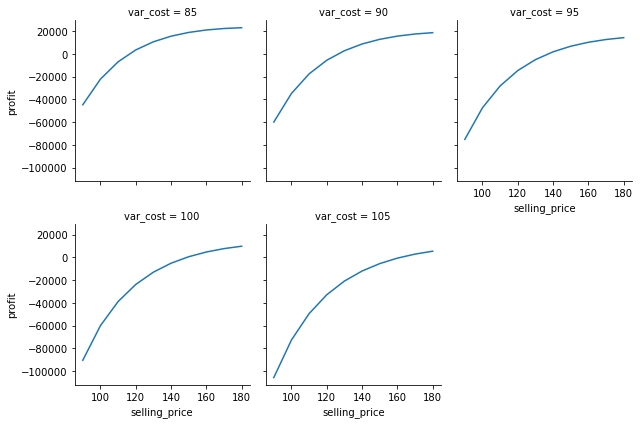

In [78]:
profit_dt_g = sns.FacetGrid(m_dt1_df, col="var_cost", sharey=True, col_wrap=3)
profit_dt_g = profit_dt_g.map(plt.plot, "selling_price", "profit")

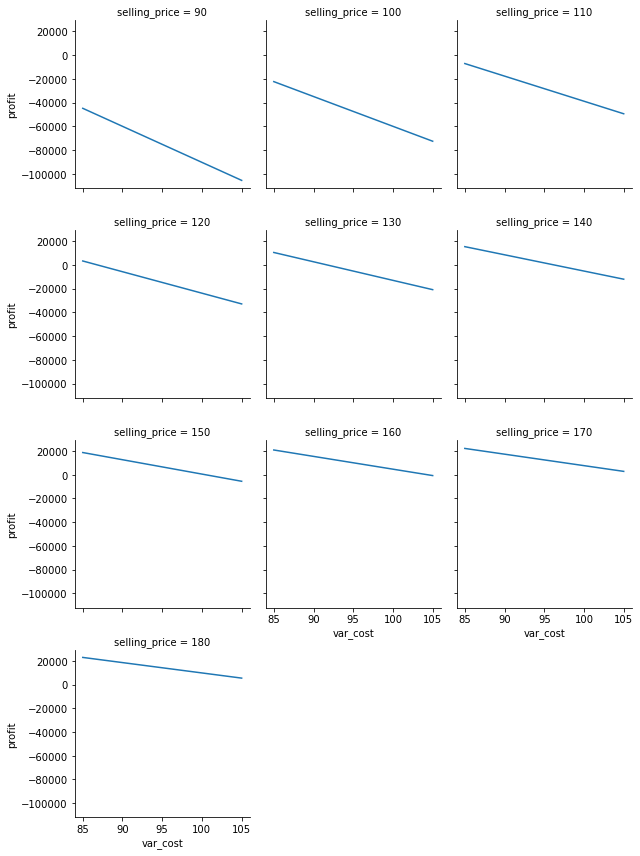

In [79]:
profit_dt_g = sns.FacetGrid(m_dt1_df, col="selling_price", sharey=True, col_wrap=3)
profit_dt_g = profit_dt_g.map(plt.plot, "var_cost", "profit")

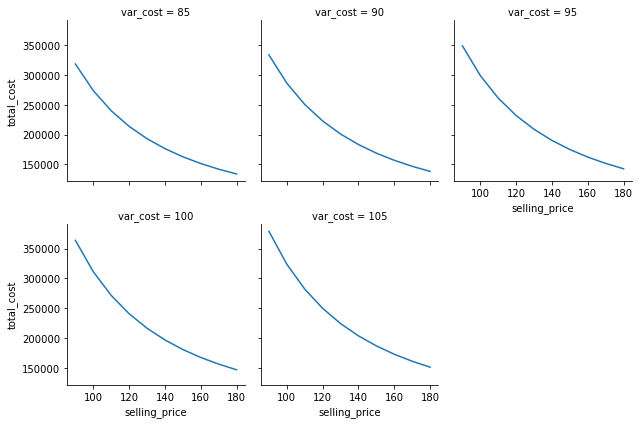

In [80]:
profit_dt_g = sns.FacetGrid(m_dt1_df, col="var_cost", sharey=True, col_wrap=3)
profit_dt_g = profit_dt_g.map(plt.plot, "selling_price", "total_cost")

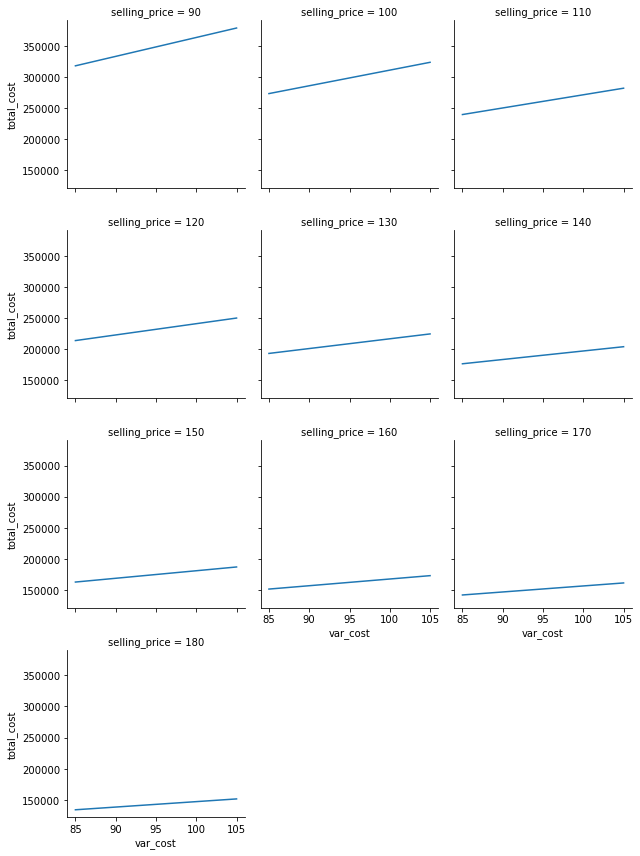

In [81]:
profit_dt_g = sns.FacetGrid(m_dt1_df, col="selling_price", sharey=True, col_wrap=3)
profit_dt_g = profit_dt_g.map(plt.plot, "var_cost", "total_cost")

## 1E - Simulation

In [115]:
from numpy.random import default_rng
rg = default_rng(4470)

In [136]:
from scipy import stats

In [138]:
num_reps = 1000
demand_sim = rg.uniform(-2.0, -1.6, size=num_reps)

sim_outputs = ['profit']
random_inputs = {'spf_exponent': demand_sim }

In [139]:
sim_results = Model.simulate(model, random_inputs, sim_outputs, scenario_inputs=None, keep_random_inputs=False)

In [140]:
def get_sim_results_df(results):
    
    dfs = []    
    for r in results:
        df = pd.DataFrame(r['output'])
        df['scenario_num'] = r['scenario_num']
        for key, val in r['scenario_vals'].items():
            df[key] = val
            
        dfs.append(df)

    results_df = pd.concat(dfs)
    
    return results_df

In [141]:
sim_results_df = get_sim_results_df(sim_results)

In [142]:
sim_results_df

,profit,scenario_num
0,-6681.109976,0
1,43876.696883,0
2,69683.584802,0
3,-7591.593917,0
4,-16049.064783,0
...,...,...
995,5651.957764,0
996,80022.177823,0
997,9743.924884,0
998,-23968.802879,0


In [143]:
sim_results_df.groupby(['scenario_num'])['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
scenario_num,,,,,,,,
0,1000.0,24186.279095,46446.533121,-33194.36318,-13397.581387,9280.834931,56249.269388,137619.98073


In [144]:
sim_results_df['profit']

0      -6681.109976
1      43876.696883
2      69683.584802
3      -7591.593917
4     -16049.064783
           ...     
995     5651.957764
996    80022.177823
997     9743.924884
998   -23968.802879
999    88499.872733
Name: profit, Length: 1000, dtype: float64

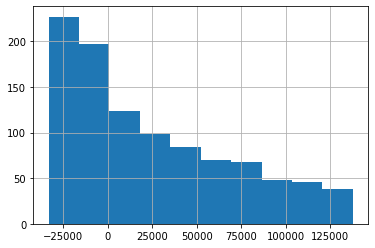

In [145]:
sim_results_df['profit'].hist(bins=10);

In [146]:
print(stats.percentileofscore(sim_results_df['profit'], 0) / 100.0)

0.414


Probability that profit is negative is .414.

# Part Two

## 2A - New Model 

In [147]:
class SingleProductSPF1(Model):
    def __init__(self, fixed_cost=60e+3, var_cost=90, selling_price=120, spf_scale=10e+6, spf_exponent=-1.8, ot_threshold = 1000, ot_var_cost = 110, lost_demand_threshold = 1200):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_scale = spf_scale
        self.spf_exponent = spf_exponent
        self.ot_threshold = ot_threshold
        self.ot_var_cost = ot_var_cost
        self.lost_demand_threshold = lost_demand_threshold
        
    def SPF_demand(self):
        """compute demand"""
        return self.spf_scale * self.selling_price ** self.spf_exponent
    
    def total_cost(self):
        """compute total cost"""
        if self.SPF_demand() <= 1000:
            return self.fixed_cost + self.var_cost * self.SPF_demand()
        elif self.SPF_demand() <= self.lost_demand_threshold:
            return self.fixed_cost + (self.var_cost * 1000) + (self.ot_var_cost * (self.SPF_demand() - 1000))
        else:
            return self.fixed_cost + (self.var_cost * 1000) + (self.ot_var_cost * 200)
        
        
    def revenue(self):
        """compute revenue"""
        if self.SPF_demand() <= self.lost_demand_threshold:
            return self.selling_price * self.SPF_demand()
        else:
            return self.selling_price * 1200
    
    def units_sold(self):
        if self.SPF_demand() <= self.lost_demand_threshold:
            return self.SPF_demand()
        else:
            return 1200
    
        
    def profit(self):
        """compute profit"""
        profit = self.revenue() - self.total_cost()
        return profit
    
    

In [148]:
model1 = SingleProductSPF1()

## 2A - One Way Data Table

In [149]:
dt_param_ranges_2 = {'selling_price': np.arange(90, 500, 10)}
outputs2 = ['profit', 'SPF_demand', 'units_sold']
m_dt2_df = Model.data_table(model1, dt_param_ranges_2, outputs2)

In [150]:
m_dt2_df

,selling_price,profit,SPF_demand,units_sold
0,90,-64000.000000,3036.431464,1200.000000
1,100,-52000.000000,2511.886432,1200.000000
2,110,-40000.000000,2115.890393,1200.000000
3,120,-28000.000000,1809.146587,1200.000000
4,130,-16000.000000,1566.397444,1200.000000
5,140,-4000.000000,1370.785607,1200.000000
6,150,8000.000000,1210.697746,1200.000000
7,160,13895.689901,1077.913798,1077.913798
8,170,17318.234466,966.477931,966.477931
9,180,18478.736125,871.985957,871.985957


## 2A - Goal Seek

In [151]:
Model.goal_seek(model1,'profit', 0, 'selling_price', 90, 250)

143.33333333333334

## 2B - Goal Seek Strangeness

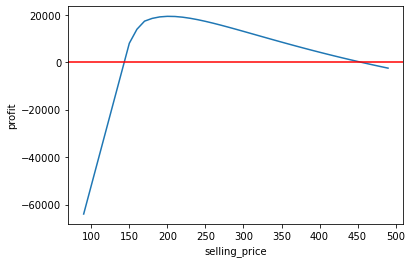

In [152]:
graph = sns.lineplot(x = m_dt2_df['selling_price'], y = m_dt2_df['profit'])
graph.axhline(0, color = 'r');

In [154]:
print(f"Break even selling price: {Model.goal_seek(model1,'profit', 0, 'selling_price', 90, 500):.2f}")

TypeError: unsupported format string passed to NoneType.__format__

In [153]:
print(f"Break even selling price: {Model.goal_seek(model1,'profit', 0, 'selling_price', 90, 250):.2f}")

Break even selling price: 143.33


In [155]:
print(f"Break even selling price: {Model.goal_seek(model1,'profit', 0, 'selling_price', 300, 500):.2f}")

Break even selling price: 454.47


Our function of profit related to selling price is quadratic so we cross \\$0 at two points. Using the goal seek function with range of $90 to \\$500 will through an error because we have two answers and our goal seek function is only prepared for one. Moving these ranges to only cover one such break even point will allow for proper behavior. 